In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import momi
import os
import pandas as pd
import PTA

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
40


In [2]:
model = PTA.DemographicModel("expanding-counts")
model.set_param("project_dir", "./analysis/14samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 14)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = False
model.simulate(nsims=4000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-counts     ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/14samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
14                   ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_p

In [3]:
sim_df = pd.read_csv("./analysis/14samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
print(len(sim_df))
sfs_cols = [col for col in sim_df.columns if col.startswith("pop")]
params_cols = [col for col in sim_df.columns if col not in sfs_cols]
display(sim_df[sfs_cols].head())
display(sim_df[params_cols].head())

4000


,pop0-[[13__1]],pop0-[[12__2]],pop0-[[11__3]],pop0-[[10__4]],pop0-[[9_5]],pop0-[[8_6]],pop0-[[7_7]],pop1-[[13__1]],pop1-[[12__2]],pop1-[[11__3]],pop1-[[10__4]],pop1-[[9_5]],pop1-[[8_6]],pop1-[[7_7]],pop2-[[13__1]],pop2-[[12__2]],pop2-[[11__3]],pop2-[[10__4]],pop2-[[9_5]],pop2-[[8_6]],pop2-[[7_7]],pop3-[[13__1]],pop3-[[12__2]],pop3-[[11__3]],pop3-[[10__4]],pop3-[[9_5]],pop3-[[8_6]],pop3-[[7_7]],pop4-[[13__1]],pop4-[[12__2]],pop4-[[11__3]],pop4-[[10__4]],pop4-[[9_5]],pop4-[[8_6]],pop4-[[7_7]],pop5-[[13__1]],pop5-[[12__2]],pop5-[[11__3]],pop5-[[10__4]],pop5-[[9_5]],pop5-[[8_6]],pop5-[[7_7]],pop6-[[13__1]],pop6-[[12__2]],pop6-[[11__3]],pop6-[[10__4]],pop6-[[9_5]],pop6-[[8_6]],pop6-[[7_7]],pop7-[[13__1]],pop7-[[12__2]],pop7-[[11__3]],pop7-[[10__4]],pop7-[[9_5]],pop7-[[8_6]],pop7-[[7_7]]
0,9729,7278,7773,6619,6474,6005,3151,14287,8412,6848,4575,4650,5403,2307,92,37,44,25,31,26,9,1105,1152,892,974,615,741,302,3385,2578,2751,2819,3328,2583,1856,515,300,264,217,205,204,100,181,95,66,53,55,56,41,3789,3081,2382,2643,2490,2041,1455
1,6203,4807,4375,4596,4160,3722,1374,5575,4790,4703,3858,3673,3453,1926,741,416,343,299,244,272,146,2479,1503,1169,1207,905,1061,467,4877,3865,3978,2429,2603,2715,1428,2784,2331,1764,2002,1617,1472,887,5214,3301,2939,2794,2509,2335,1026,716,680,580,523,635,515,190
2,5853,4560,4345,3778,3472,3788,1505,5701,4515,3856,3761,3814,4993,1552,292,138,130,78,95,82,43,2922,2079,1875,1715,1704,1522,883,2752,2261,1838,1683,1627,1571,946,6326,5103,4196,4256,3418,4104,1685,2227,1434,2011,1729,2093,1462,1077,418,330,287,256,200,218,118
3,573,693,375,283,351,275,196,622,520,350,497,324,410,145,2063,1338,1000,1244,956,1207,454,4426,2860,2807,2547,2277,1866,1123,1412,989,753,839,711,688,442,7256,6753,7270,6824,5536,6042,3489,3832,3489,2482,2747,3123,2918,1370,6791,5130,5525,5216,4755,4846,1969
4,1619,1316,1119,1016,1093,896,512,1862,1329,1368,959,1032,1168,563,1782,1453,1258,1000,1011,1033,487,1214,1112,788,850,794,633,429,5902,5800,5128,5033,4103,4652,1920,6329,4422,3041,2317,2592,2227,1140,4461,3123,2432,1940,1927,1645,700,2264,1943,1600,1879,1569,1768,921


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
0,0.182,1,0,771715,0.0,663009.000,301838.424,-1.149,-0.173,777457.5,229025.75,13.218,2.766,0.095,-0.740,13.648,3.355,396025.125,311103.683,0.450,-1.173,309463.0,496710.25
1,0.290,2,1,363951,0.0,515535.143,242596.692,-0.228,-0.664,494465.0,247522.50,6.181,2.806,0.047,-1.225,5.753,4.045,529653.250,317023.564,-0.497,-1.551,690697.0,589084.50
2,0.250,2,1,379571,0.0,471360.286,213543.862,-0.135,-1.016,423362.0,288646.00,11.393,5.703,0.304,-1.759,7.710,10.760,429117.250,272536.938,0.488,-0.846,379001.0,399327.50
3,0.251,2,1,553630,0.0,695184.571,269872.784,-0.899,-0.442,847308.0,345004.00,9.982,4.902,0.444,-0.590,11.108,5.717,587896.500,226851.272,-0.417,-0.557,628416.5,281864.25
4,0.348,3,1,58027,0.0,225539.833,186649.913,0.300,-1.646,171770.0,348282.75,12.368,4.965,-0.443,-1.521,14.027,8.905,389223.625,234659.102,0.673,-1.010,283178.0,331280.25


In [4]:
from sklearn.ensemble import RandomForestRegressor
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
# This is super dumb
sim_df = pd.read_csv("./analysis/14samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)


Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-14 11:27:35.319731
Predict() finished: 2021-09-14 11:27:48.811941
                             MAE         RMSE    vscore        R2
zeta                    0.149935     0.002814  0.617133  0.616577
zeta_e                  1.203464     0.022663  0.624387  0.623832
psi                     0.227919     0.004948  0.332326  0.332092
t_s                190871.255196  3681.494550  0.329623  0.329613
omega                   0.002820     0.001036 -0.009357 -0.009360
taus_mean          107587.108039  2176.383319  0.202411  0.202378
taus_std            66491.717669  1322.833996  0.281095  0.280765
taus_skewness     

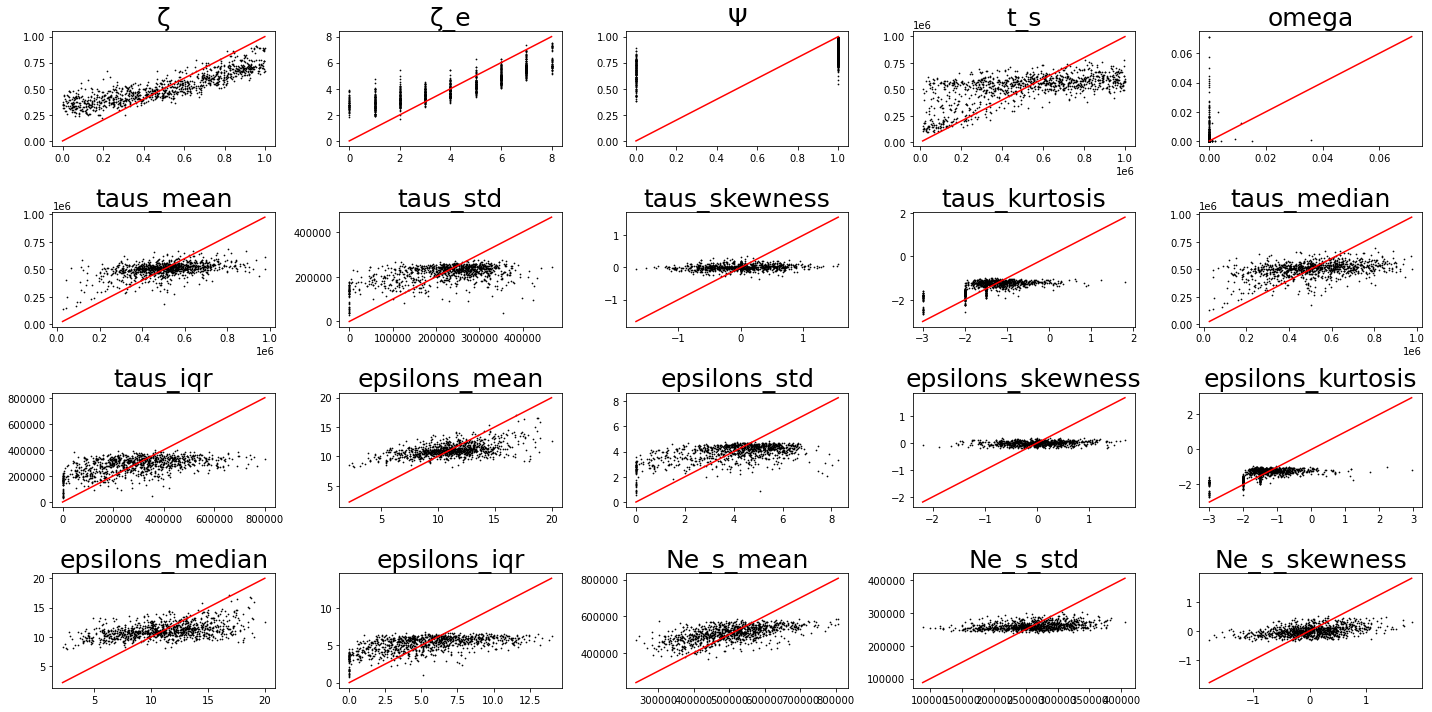

In [7]:
sim_df = pd.read_csv("./analysis/14samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
#rgr1.set_targets(["zeta", "t_s", "omega"])
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

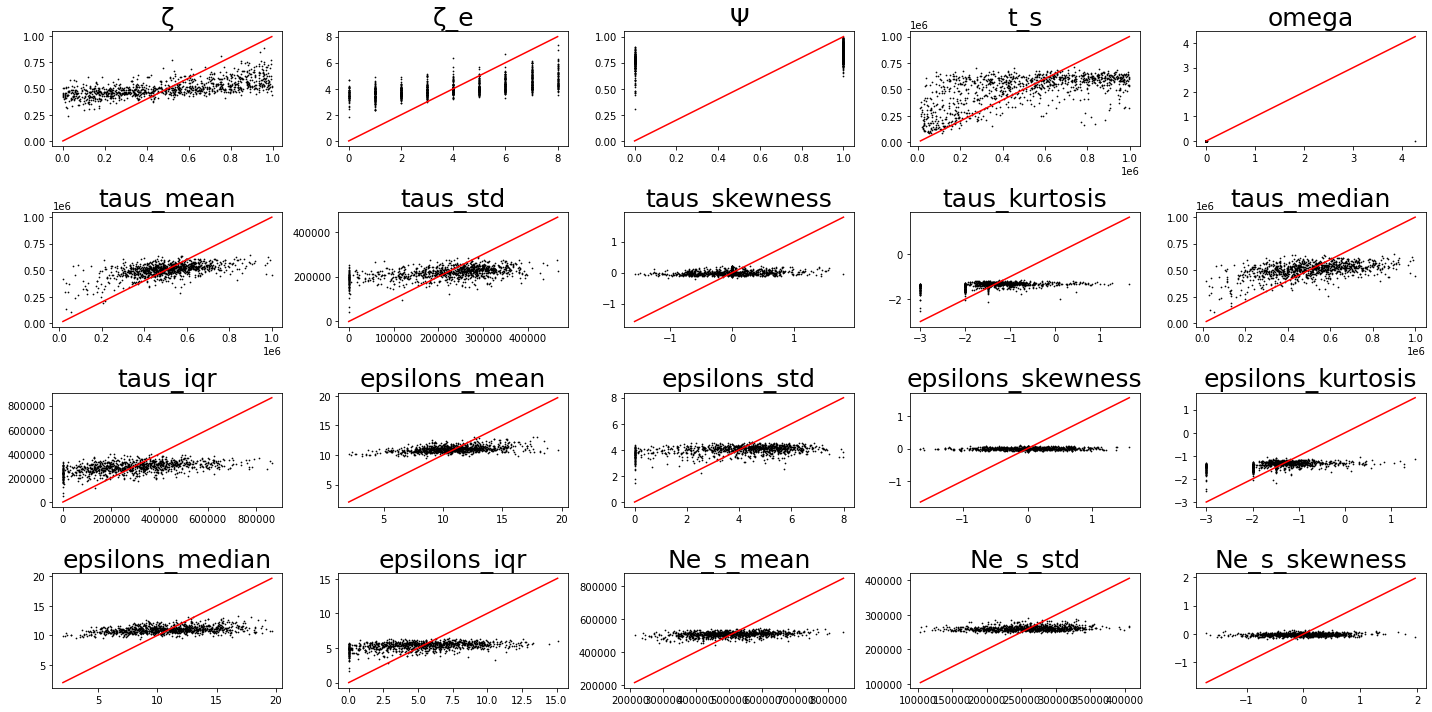

In [15]:
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

In [48]:
sim_df1[sim_df1["omega"]>0]

,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr,pop0-[[13__1]],pop0-[[12__2]],pop0-[[11__3]],pop0-[[10__4]],pop0-[[9_5]],pop0-[[8_6]],pop0-[[7_7]],pop1-[[13__1]],pop1-[[12__2]],pop1-[[11__3]],pop1-[[10__4]],pop1-[[9_5]],pop1-[[8_6]],pop1-[[7_7]],pop2-[[13__1]],pop2-[[12__2]],pop2-[[11__3]],pop2-[[10__4]],pop2-[[9_5]],pop2-[[8_6]],pop2-[[7_7]],pop3-[[13__1]],pop3-[[12__2]],pop3-[[11__3]],pop3-[[10__4]],pop3-[[9_5]],pop3-[[8_6]],pop3-[[7_7]],pop4-[[13__1]],pop4-[[12__2]],pop4-[[11__3]],pop4-[[10__4]],pop4-[[9_5]],pop4-[[8_6]],pop4-[[7_7]],pop5-[[13__1]],pop5-[[12__2]],pop5-[[11__3]],pop5-[[10__4]],pop5-[[9_5]],pop5-[[8_6]],pop5-[[7_7]],pop6-[[13__1]],pop6-[[12__2]],pop6-[[11__3]],pop6-[[10__4]],pop6-[[9_5]],pop6-[[8_6]],pop6-[[7_7]],pop7-[[13__1]],pop7-[[12__2]],pop7-[[11__3]],pop7-[[10__4]],pop7-[[9_5]],pop7-[[8_6]],pop7-[[7_7]]
30,0.933,7,1,73202,0.010,75982.500,2780.500,0.000,-2.0,75982.5,2780.5,3.697,0.682,0.000,-2.0,3.697,0.682,575281.250,261171.643,-0.113,-0.769,542020.0,319956.50,0.296,0.180,0.144,0.130,0.102,0.102,0.045,0.295,0.195,0.139,0.118,0.099,0.102,0.051,0.302,0.176,0.143,0.131,0.111,0.091,0.046,0.309,0.183,0.141,0.119,0.101,0.106,0.041,0.295,0.189,0.139,0.128,0.105,0.100,0.045,0.291,0.183,0.139,0.127,0.113,0.103,0.043,0.306,0.189,0.137,0.122,0.104,0.102,0.040,0.286,0.194,0.135,0.129,0.102,0.100,0.054
219,0.805,6,1,312642,0.001,344465.667,22608.281,-0.678,-1.5,357705.0,25204.0,13.679,3.919,-0.693,-1.5,16.128,4.305,631470.875,189158.626,0.237,-0.903,631354.5,193515.00,0.232,0.174,0.156,0.132,0.118,0.127,0.062,0.212,0.176,0.159,0.139,0.130,0.127,0.057,0.211,0.170,0.144,0.146,0.134,0.125,0.069,0.215,0.183,0.141,0.139,0.128,0.120,0.075,0.214,0.173,0.156,0.151,0.122,0.126,0.058,0.224,0.157,0.154,0.138,0.125,0.131,0.071,0.192,0.162,0.154,0.140,0.147,0.127,0.078,0.207,0.166,0.170,0.121,0.136,0.133,0.067
316,0.814,7,1,390986,0.004,381354.000,9632.000,0.000,-2.0,381354.0,9632.0,8.421,3.619,-0.000,-2.0,8.421,3.619,468673.250,220765.562,0.150,-0.584,419284.5,242761.25,0.199,0.177,0.148,0.150,0.137,0.131,0.057,0.202,0.164,0.150,0.133,0.145,0.140,0.066,0.186,0.171,0.148,0.150,0.132,0.138,0.075,0.208,0.171,0.137,0.147,0.139,0.119,0.080,0.212,0.142,0.138,0.148,0.132,0.145,0.083,0.200,0.166,0.160,0.137,0.140,0.125,0.071,0.216,0.154,0.150,0.143,0.126,0.144,0.067,0.279,0.213,0.145,0.123,0.120,0.087,0.032
400,0.818,7,1,281420,0.009,275974.500,5445.500,0.000,-2.0,275974.5,5445.5,10.382,0.260,0.000,-2.0,10.382,0.260,488806.375,326628.787,0.322,-1.309,395865.5,517709.50,0.234,0.189,0.158,0.143,0.120,0.112,0.045,0.238,0.191,0.147,0.134,0.115,0.114,0.061,0.233,0.190,0.147,0.138,0.120,0.119,0.053,0.233,0.180,0.152,0.131,0.126,0.112,0.065,0.239,0.191,0.148,0.128,0.125,0.110,0.058,0.240,0.182,0.157,0.130,0.117,0.112,0.063,0.239,0.180,0.157,0.134,0.124,0.110,0.056,0.198,0.172,0.159,0.141,0.135,0.131,0.062
402,0.877,7,1,64714,4.269,64591.000,123.000,0.000,-2.0,64591.0,123.0,11.426,6.096,0.000,-2.0,11.426,6.096,387691.500,340753.384,0.483,-1.361,274740.0,593665.00,0.183,0.170,0.180,0.134,0.138,0.126,0.069,0.177,0.162,0.159,0.147,0.124,0.159,0.072,0.201,0.172,0.157,0.159,0.123,0.117,0.072,0.181,0.152,0.156,0.135,0.151,0.155,0.069,0.173,0.161,0.164,0.151,0.137,0.145,0.068,0.197,0.159,0.160,0.138,0.153,0.127,0.066,0.171,0.186,0.147,0.162,0.124,0.141,0.069,0.221,0.162,0.137,0.139,0.170,0.112,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11724,0.904,7,1,548603,0.003,561623.000,13020.000,0.000,-2.0,561623.0,13020.0,7.337,3.140,0.000,-2.0,7.337,3.140,670031.375,312729.173,

## Sorted summary statistics

In [8]:
model = PTA.DemographicModel("expanding-sorted-counts")
model.set_param("project_dir", "./analysis/14samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 14)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = False
model.simulate(nsims=4000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted-counts ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/14samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
14                   ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recom

4000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-14 12:22:03.727572
Predict() finished: 2021-09-14 12:22:17.533296
                             MAE         RMSE    vscore        R2
zeta                    0.113549     0.002206  0.768482  0.768481
zeta_e                  0.891123     0.017489  0.778752  0.778751
psi                     0.238813     0.005258  0.286437  0.286436
t_s                205215.568635  3911.984428  0.268120  0.268116
omega                   0.000393     0.000077 -0.016369 -0.016369
taus_mean          102578.713668  2109.443725  0.269131  0.269116
taus_std            61155.726048  1227.127199  0.404888  0.404882
taus_skewness

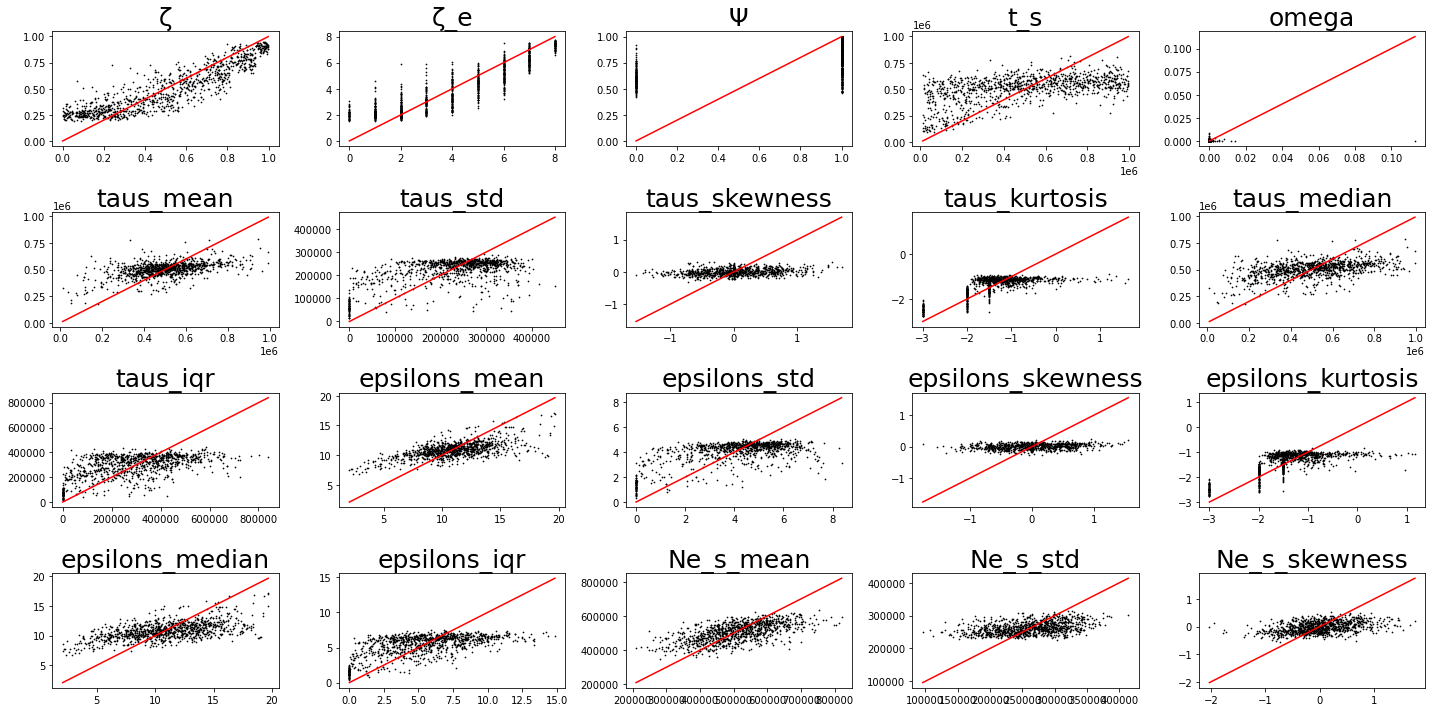

In [10]:
sim_df1 = pd.read_csv("./analysis/14samps_expanding_sims/expanding-sorted-counts-SIMOUT.csv", sep=" ")
print(len(sim_df1))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df1,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
#rgr1.set_targets(["zeta", "t_s", "omega"])
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

## Trash below here

In [47]:
model.simulate(nsims=1, quiet=False, verbose=False)

    Generating 1 simulation(s).
  [                    ]   0%  Performing Simulations    | 0:00:00 | > /home/isaac/PTA/PTA/demography.py(577)serial_simulate()
    575                 ## pulses, then this will have to change
    576                 import pdb; pdb.set_trace()
--> 577                 msfs.set_params(pd.Series([zeta, zeta_e, psi, taus[0], pops_per_tau, taus, epsilons, N_es],\
    578                                         index=["zeta", "zeta_e", "psi", "t_s", "pops_per_tau", "taus", "epsilons", "N_es"]))
    579                 msfs_list.append(msfs)

ipdb> n
> /home/isaac/PTA/PTA/demography.py(578)serial_simulate()
    576                 import pdb; pdb.set_trace()
    577                 msfs.set_params(pd.Series([zeta, zeta_e, psi, taus[0], pops_per_tau, taus, epsilons, N_es],\
--> 578                                         index=["zeta", "zeta_e", "psi", "t_s", "pops_per_tau", "taus", "epsilons", "N_es"]))
    579                 msfs_list.append(msfs)
    580 

i

In [41]:
import itertools
import numpy as np

def _sample_tau(ntaus=1, pops_per_tau=[6, 1, 1]):
    tau = (1000, 10000)
    if isinstance(tau, tuple):
        tau = (tau[0], tau[1]+1)
    else:
        tau = (tau, tau+1)
    taus = [[np.random.randint(tau[0], tau[1], 1)[0]] * x for x in pops_per_tau]
    return taus
ts = _sample_tau(pops_per_tau=[5,1,1,1])
ts = np.array(itertools.chain.from_iterable(ts))
ts

array(<itertools.chain object at 0x7fc9dee12940>, dtype=object)

[5, 5, 5, 5, 5]